<a href="https://colab.research.google.com/github/woneuy01/AudioToText/blob/master/NLP_ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 10 documents
Count Vectorizer:



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'well': 1253, 'feel': 450, 'vaccin': 1220, 'like': 660, 'test': 1133, 'gon': 509, 'na': 748, 'go': 504, 'away': 130, 'without': 1272, 'see': 1001, 'hope': 565, 'period': 832, 'time': 1149, 'may': 695, 'flare': 463, 'guess': 524, 'know': 629, 'would': 1282, 'expect': 421, 'fall': 437, 'yield': 1293, 'mayb': 696, 'accord': 53, 'lot': 677, 'peopl': 828, 'say': 988, 'probabl': 877, 'abl': 45, 'put': 898, 'next': 764, 'year': 1290, 'eventu': 406, 'god': 506, 'good': 510, 'virus': 1232, 'lose': 674, 'came': 183, 'went': 1254, 'never': 761, 'found': 477, 'disappear': 342, 'shown': 1025, 'die': 334, 'everyth': 412, 'els': 384, 'whether': 1257, 'think': 1141, 'great': 517, 'progress': 883, 'made': 681, 'johnson': 613, 'oxford': 807, 'veri': 1225, 'advanc': 69, 'get': 497, 'point': 850, 'break': 169, 'news': 763, 'washington': 1242, 'tonight': 1160, 'offici': 785, 'confirm': 258, 'vice': 1227, 'presid': 869, 'mike': 712, 'penc': 826, 'distanc': 346, 'press': 871, 'secretari': 999, 'posit': 854,

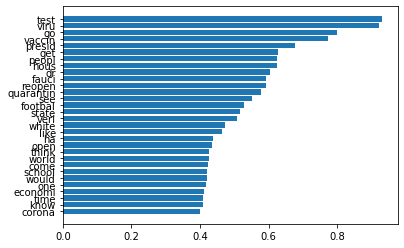

In [0]:
#stemming 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
#'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 
#'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
# 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
#'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
# 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
# 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
#'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 
#'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 
#'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
# 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
# "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 10 documents
Count Vectorizer:



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'well feel': 3333, 'feel vaccin': 1048, 'vaccin like': 3176, 'like feel': 1618, 'feel test': 1047, 'test gon': 2912, 'gon na': 1216, 'na go': 1868, 'go away': 1190, 'away without': 260, 'without vaccin': 3393, 'vaccin go': 3175, 'go go': 1197, 'away go': 257, 'go see': 1205, 'see hope': 2622, 'hope period': 1375, 'period time': 2144, 'time may': 3006, 'may flare': 1715, 'flare guess': 1068, 'guess know': 1264, 'know would': 1544, 'would expect': 3432, 'expect time': 960, 'time fall': 2999, 'fall yield': 996, 'yield flare': 3469, 'flare mayb': 1069, 'mayb mayb': 1727, 'mayb accord': 1725, 'accord lot': 88, 'lot peopl': 1675, 'peopl say': 2132, 'say probabl': 2577, 'probabl abl': 2270, 'abl put': 75, 'put may': 2320, 'flare next': 1070, 'next year': 1931, 'year eventu': 3455, 'eventu gon': 920, 'na god': 1869, 'god gon': 1210, 'na good': 1870, 'good know': 1219, 'know virus': 1541, 'virus lose': 3259, 'lose came': 1666, 'came went': 375, 'went vaccin': 3344, 'vaccin never': 3178, 'never

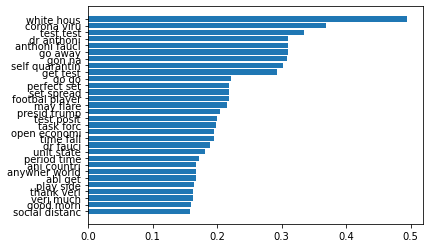

In [0]:
#stemming 2-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 10 documents
Count Vectorizer:



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'well feel vaccin': 3626, 'feel vaccin like': 1136, 'vaccin like feel': 3458, 'like feel test': 1762, 'feel test gon': 1135, 'test gon na': 3158, 'gon na go': 1326, 'na go away': 2034, 'go away without': 1294, 'away without vaccin': 290, 'without vaccin go': 3710, 'vaccin go go': 3457, 'go go away': 1302, 'go away go': 1291, 'away go see': 288, 'go see hope': 1311, 'see hope period': 2838, 'hope period time': 1500, 'period time may': 2325, 'time may flare': 3270, 'may flare guess': 1870, 'flare guess know': 1157, 'guess know would': 1386, 'know would expect': 1684, 'would expect time': 3753, 'expect time fall': 1043, 'time fall yield': 3262, 'fall yield flare': 1080, 'yield flare mayb': 3791, 'flare mayb mayb': 1158, 'mayb mayb accord': 1884, 'mayb accord lot': 1882, 'accord lot peopl': 98, 'lot peopl say': 1827, 'peopl say probabl': 2311, 'say probabl abl': 2791, 'probabl abl put': 2461, 'abl put may': 83, 'put may flare': 2513, 'may flare next': 1871, 'flare next year': 1159, 'next 

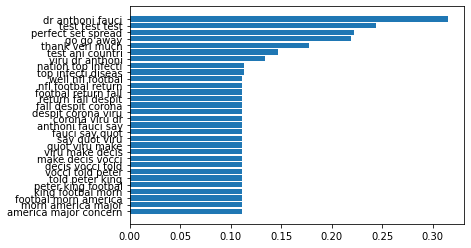

In [0]:
#stemming 3-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))       


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]
print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 10 documents
Count Vectorizer:



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'well': 1310, 'feel': 476, 'vaccines': 1277, 'like': 692, 'test': 1190, 'gon': 533, 'na': 782, 'go': 529, 'away': 133, 'without': 1326, 'vaccine': 1276, 'see': 1052, 'hopefully': 590, 'period': 872, 'time': 1205, 'may': 727, 'flare': 489, 'guess': 549, 'know': 659, 'would': 1337, 'expect': 445, 'fall': 462, 'yield': 1348, 'maybe': 728, 'accord': 53, 'lot': 709, 'people': 868, 'say': 1039, 'probably': 921, 'able': 45, 'put': 945, 'next': 799, 'year': 1343, 'eventually': 428, 'god': 531, 'good': 534, 'viruses': 1289, 'lose': 707, 'come': 248, 'never': 796, 'find': 484, 'disappear': 363, 'show': 1078, 'die': 354, 'everything': 434, 'else': 405, 'whether': 1313, 'think': 1198, 'great': 541, 'progress': 928, 'make': 717, 'johnson': 644, 'oxford': 847, 'others': 841, 'advance': 70, 'get': 522, 'point': 891, 'break': 169, 'news': 798, 'washington': 1298, 'tonight': 1214, 'official': 822, 'confirm': 265, 'vice': 1283, 'president': 913, 'mike': 744, 'pence': 866, 'distance': 367, 'press': 915,

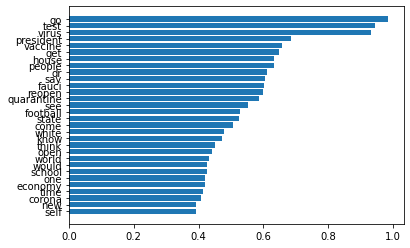

In [0]:
#lemmatization 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 10 documents
Count Vectorizer:

{'well feel': 3234, 'feel vaccines': 997, 'vaccines like': 3121, 'like feel': 1548, 'feel test': 996, 'test gon': 2846, 'gon na': 1173, 'na go': 1801, 'go away': 1146, 'away without': 253, 'without vaccine': 3285, 'vaccine go': 3106, 'go go': 1153, 'away go': 250, 'go see': 1164, 'see hopefully': 2556, 'hopefully period': 1308, 'period time': 2076, 'time may': 2940, 'may flare': 1648, 'flare guess': 1020, 'guess know': 1217, 'know would': 1480, 'would expect': 3326, 'expect time': 911, 'time fall': 2933, 'fall yield': 947, 'yield flare': 3362, 'flare maybe': 1021, 'maybe maybe': 1660, 'maybe accor

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


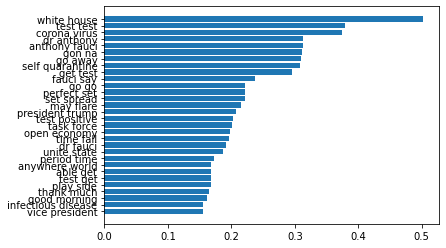

In [0]:
#lemmatization 2-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 10 documents
Count Vectorizer:

{'well feel vaccines': 3512, 'feel vaccines like': 1083, 'vaccines like feel': 3392, 'like feel test': 1686, 'feel test gon': 1082, 'test gon na': 3086, 'gon na go': 1279, 'na go away': 1960, 'go away without': 1246, 'away without vaccine': 281, 'without vaccine go': 3586, 'vaccine go go': 3377, 'go go away': 1254, 'go away go': 1243, 'away go see': 279, 'go see hopefully': 1266, 'see hopefully period': 2763, 'hopefully period time': 1428, 'period time may': 2248, 'time may flare': 3198, 'may flare guess': 1796, 'flare guess know': 1106, 'guess know would': 1335, 'know would expect': 1614, 'would 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


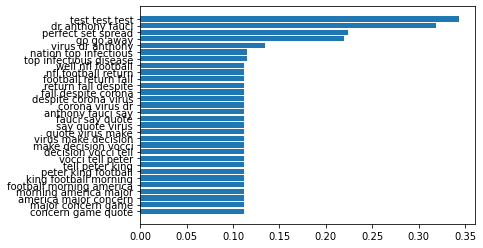

In [0]:
#lemmatization 3-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item, pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 10 documents
Count Vectorizer:



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'onc', 'onli', 'ourselv', 'themselv', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'well': 1230, 'feel': 447, 'vaccin': 1197, 'like': 649, 'test': 1113, 'gon': 503, 'na': 734, 'go': 498, 'away': 130, 'without': 1248, 'see': 985, 'hope': 556, 'period': 818, 'time': 1128, 'may': 682, 'flare': 460, 'guess': 516, 'know': 619, 'would': 1258, 'expect': 418, 'fall': 434, 'yield': 1268, 'mayb': 683, 'accord': 53, 'lot': 665, 'peopl': 814, 'say': 972, 'probabl': 863, 'abl': 45, 'put': 883, 'next': 750, 'year': 1265, 'eventu': 403, 'god': 500, 'good': 504, 'virus': 1209, 'lose': 663, 'come': 240, 'never': 747, 'find': 455, 'disappear': 340, 'show': 1007, 'die': 332, 'everyth': 409, 'els': 381, 'whether': 1233, 'think': 1121, 'great': 509, 'progress': 869, 'make': 672, 'johnson': 604, 'oxford': 793, 'veri': 1202, 'advanc': 69, 'get': 492, 'point': 836, 'break': 168, 'news': 749, 'washington': 1219, 'tonight': 1138, 'offici': 771, 'confirm': 256, 'vice': 1204, 'presid': 855, 'mike': 698, 'penc': 812, 'distanc': 344, 'press': 857, 'secretari': 983, 'posit': 840, 'self': 987, 'is

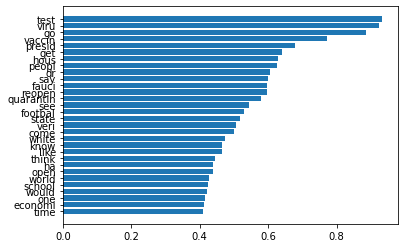

In [0]:
#stemming and lemmatization 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        lemma = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in stems]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()